In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
con = sqlite3.connect('zippedData/im.db')
cursor_obj = con.cursor()

In [37]:
mov_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
mov_info = pd.read_table('zippedData/rt.movie_info.tsv')
reviews = pd.read_table('zippedData/rt.reviews.tsv', encoding= 'unicode_escape')
rot_tom = pd.read_csv('zippedData/rotten_tomatoes_movies.csv')

In [38]:
mov_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [39]:
mov_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


### dropping currency, box_office, and studio

In [40]:
mov_info.sort_values(by='theater_date', inplace = True) 
mov_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
496,647,A singer (Frank Sinatra) and his pianist (Alex...,NR,Drama|Musical and Performing Arts,Joseph Pevney,Don McGuire,"Apr 1, 1952","Aug 3, 1994",NaN,NaN,86 minutes,NaN
843,1090,Voter apathy in the United States is at an all...,R,Classics|Comedy,NaN,Jack Margolis,"Apr 1, 1975","Sep 2, 2008",NaN,NaN,95 minutes,NaN
1531,1969,Melvin Frank's burlesque amalgam of McCabe and...,PG,Action and Adventure|Comedy|Western,Melvin Frank,NaN,"Apr 1, 1976","Jun 7, 2005",NaN,NaN,104 minutes,NaN
22,29,This futuristic adventure stars Lee Majors as ...,PG,Action and Adventure|Drama|Science Fiction and...,Martyn Burke,NaN,"Apr 1, 1981","May 10, 2011",NaN,NaN,101 minutes,NaN
402,523,When a group of college students volunteer to ...,R,Horror,Stephen Carpenter|Jeffrey Obrow,NaN,"Apr 1, 1982","Mar 8, 2005",NaN,NaN,85 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1547,1987,Patrick Dempsey stars in this biography of Son...,PG-13,Comedy,Phil Alden Robinson,Phil Alden Robinson,NaN,NaN,NaN,NaN,98 minutes,NaN
1548,1988,When the money-hungry Duke Stuyvesant (Sterlin...,R,Comedy,Les Rose,NaN,NaN,NaN,NaN,NaN,94 minutes,NaN
1549,1989,Hungarian Rhapsody (Magyar Rapszodia) is the f...,NR,Art House and International|Drama,NaN,NaN,NaN,NaN,NaN,NaN,101 minutes,NaN


In [41]:
mov_info_1 = mov_info.drop(columns = ['currency', "box_office", "studio"], axis = 1)
mov_info_1.columns


Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime'],
      dtype='object')

In [42]:
mov_info_1['rating'].value_counts()

R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64

### SORTED BY DATE

In [43]:

mov_info_1.sort_values(by='theater_date', inplace = True) 
mov_info_1


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
496,647,A singer (Frank Sinatra) and his pianist (Alex...,NR,Drama|Musical and Performing Arts,Joseph Pevney,Don McGuire,"Apr 1, 1952","Aug 3, 1994",86 minutes
843,1090,Voter apathy in the United States is at an all...,R,Classics|Comedy,NaN,Jack Margolis,"Apr 1, 1975","Sep 2, 2008",95 minutes
1531,1969,Melvin Frank's burlesque amalgam of McCabe and...,PG,Action and Adventure|Comedy|Western,Melvin Frank,NaN,"Apr 1, 1976","Jun 7, 2005",104 minutes
22,29,This futuristic adventure stars Lee Majors as ...,PG,Action and Adventure|Drama|Science Fiction and...,Martyn Burke,NaN,"Apr 1, 1981","May 10, 2011",101 minutes
402,523,When a group of college students volunteer to ...,R,Horror,Stephen Carpenter|Jeffrey Obrow,NaN,"Apr 1, 1982","Mar 8, 2005",85 minutes
...,...,...,...,...,...,...,...,...,...
1543,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1547,1987,Patrick Dempsey stars in this biography of Son...,PG-13,Comedy,Phil Alden Robinson,Phil Alden Robinson,NaN,NaN,98 minutes
1548,1988,When the money-hungry Duke Stuyvesant (Sterlin...,R,Comedy,Les Rose,NaN,NaN,NaN,94 minutes
1549,1989,Hungarian Rhapsody (Magyar Rapszodia) is the f...,NR,Art House and International|Drama,NaN,NaN,NaN,NaN,101 minutes


### Used get_dummies to make seperate columns for each genre and made a binary series 

In [44]:
mov_info_1["genre"] = mov_info_1["genre"].str.split("|", expand = False)


#mov_info_2 = pd.get_dummies(mov_info_1["genre"].apply(result_type = expand).stack())

In [45]:
mov_info_1["genre"]

496                  [Drama, Musical and Performing Arts]
843                                    [Classics, Comedy]
1531              [Action and Adventure, Comedy, Western]
22      [Action and Adventure, Drama, Science Fiction ...
402                                              [Horror]
                              ...                        
1543                                                  NaN
1547                                             [Comedy]
1548                                             [Comedy]
1549                 [Art House and International, Drama]
1551                        [Action and Adventure, Drama]
Name: genre, Length: 1560, dtype: object

In [46]:
mov_info_1.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
runtime         object
dtype: object

In [47]:
pd.get_dummies(mov_info_1["genre"].explode()).groupby(level=0).sum()

,Action and Adventure,Animation,Anime and Manga,Art House and International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith and Spirituality,...,Horror,Kids and Family,Musical and Performing Arts,Mystery and Suspense,Romance,Science Fiction and Fantasy,Special Interest,Sports and Fitness,Television,Western
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1556,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1557,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1558,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [48]:
expanded_genre_df = pd.get_dummies(mov_info_1["genre"].explode()).groupby(level=0).sum()
mov_info_2 = mov_info_1.join(expanded_genre_df )
mov_info_2['Comedy'].value_counts()

0    1010
1     550
Name: Comedy, dtype: int64

In [49]:
mov_info_2.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime', 'Action and Adventure',
       'Animation', 'Anime and Manga', 'Art House and International',
       'Classics', 'Comedy', 'Cult Movies', 'Documentary', 'Drama',
       'Faith and Spirituality', 'Gay and Lesbian', 'Horror',
       'Kids and Family', 'Musical and Performing Arts',
       'Mystery and Suspense', 'Romance', 'Science Fiction and Fantasy',
       'Special Interest', 'Sports and Fitness', 'Television', 'Western'],
      dtype='object')

In [50]:
db_mov = pd.read_csv('zippedData/tmdb.movies.csv', delimiter = ",")


In [51]:
db_mov.sort_values(by='release_date', inplace = True)

In [52]:
db_mov.sort_values(by= "vote_average", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
db_mov.head(100)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
12834,12834,[99],501110,en,The Anonymous Interview,0.878,2014-04-04,The Anonymous Interview,10.0,1
7062,7062,[],352751,en,Innocence of Muslims,0.600,2012-07-01,Innocence of Muslims,10.0,1
22993,22993,[],454351,en,Bellator 178: Straus vs. Pitbull 4,0.642,2017-04-21,Bellator 178: Straus vs. Pitbull 4,10.0,1
1784,1784,[],450775,en,The Everyday Guide to Wine,0.600,2010-04-05,The Everyday Guide to Wine,10.0,1
10002,10002,"[99, 10402]",451715,en,Mickey Hart,0.600,2013-08-06,Mickey Hart,10.0,1
...,...,...,...,...,...,...,...,...,...,...
16537,16537,"[28, 99]",377924,en,1947: The LRG Video,0.600,2015-10-24,1947: The LRG Video,10.0,1
16483,16483,"[27, 18, 80, 9648]",603644,en,In the Hours of Darkness,0.600,2015-10-24,In the Hours of Darkness,10.0,1
7099,7099,[35],127700,en,The Newest Pledge,0.600,2012-08-28,The Newest Pledge,10.0,1
16532,16532,"[18, 878, 53]",413367,en,Psychoacoustic,0.600,2015-10-23,Psychoacoustic,10.0,2


In [53]:
db_mov.sort_values(by = 'popularity', axis = 0, ascending = False,
                 inplace = True, na_position ='last')
db_mov.head(50)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


In [54]:
joined_db_info = pd.concat([db_mov, mov_info_2], axis=1, join="inner")
joined_db_info.sort_values(by= "popularity", axis = 0, ascending = False,
                 inplace = True, na_position ='last')


In [55]:
Joined_table = joined_db_info.head(1000)

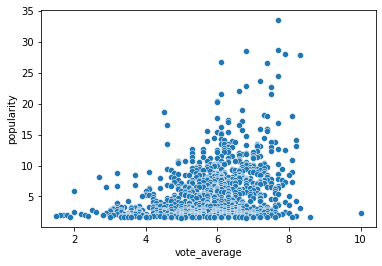

In [56]:
sns.scatterplot(x = 'vote_average', y = 'popularity', data = Joined_table )
plt.show()

In [57]:
rev_1 = reviews.dropna(subset = ['rating'] , axis = 0)
rev_1


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
...,...,...,...,...,...,...,...,...
54424,2000,Dawdles and drags when it should pop; it doesn...,1.5/5,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [58]:
%%bash 

sqlite3 zippedData/im.db
.tables



directors      movie_akas     movie_ratings  principals   
known_for      movie_basics   persons        writers      


In [59]:
%%bash 
sqlite3 zippedData/im.db
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [60]:
query = cursor_obj.execute("""
SELECT * 
FROM movie_ratings
""")

In [61]:
query.fetchall()

[('tt10356526', 8.3, 31),
 ('tt10384606', 8.9, 559),
 ('tt1042974', 6.4, 20),
 ('tt1043726', 4.2, 50352),
 ('tt1060240', 6.5, 21),
 ('tt1069246', 6.2, 326),
 ('tt1094666', 7.0, 1613),
 ('tt1130982', 6.4, 571),
 ('tt1156528', 7.2, 265),
 ('tt1161457', 4.2, 148),
 ('tt1171222', 5.1, 8296),
 ('tt1174693', 5.8, 2381),
 ('tt1181840', 7.0, 5494),
 ('tt1193623', 8.0, 5),
 ('tt1199588', 5.5, 74),
 ('tt1204784', 5.8, 6),
 ('tt1210166', 7.6, 326657),
 ('tt1212419', 6.5, 87288),
 ('tt1220911', 5.0, 941),
 ('tt1229238', 7.4, 428142),
 ('tt1232829', 7.2, 477771),
 ('tt1235548', 6.6, 2725),
 ('tt1243974', 5.4, 54646),
 ('tt1250861', 6.2, 416),
 ('tt1258812', 4.0, 21),
 ('tt1261945', 4.4, 69199),
 ('tt1266037', 7.0, 1413),
 ('tt1270291', 5.8, 5728),
 ('tt1270761', 5.6, 44490),
 ('tt1272886', 6.1, 6688),
 ('tt1274297', 5.4, 381),
 ('tt1283887', 5.4, 2527),
 ('tt1285219', 3.4, 387),
 ('tt1287879', 7.7, 76),
 ('tt1290476', 7.2, 6),
 ('tt1294141', 4.5, 113),
 ('tt1320239', 6.2, 18431),
 ('tt1322312', 6.3

In [62]:
merged_table = pd.read_sql('''
    SELECT *
  FROM movie_ratings
   JOIN movie_basics 
    USING (movie_id);
''', con)

In [63]:
merged_table.sort_values(by = 'averagerating', ascending = False)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
27644,tt8730716,10.0,5,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary
8992,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary"
26153,tt2632430,10.0,5,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
65033,tt9715646,10.0,20,Renegade,Renegade,2019,NaN,Documentary
57679,tt5344358,10.0,6,All Around Us,All Around Us,2019,NaN,Documentary
...,...,...,...,...,...,...,...,...
50971,tt6017238,1.0,21,Priklyucheniya Volodi Zlogo,Priklyucheniya Volodi Zlogo,2015,76.0,"Adventure,Comedy"
32440,tt2087999,1.0,7,Transgender Trouble,Transgender Trouble,2011,100.0,"Documentary,Music"
36456,tt1896768,1.0,21,Kikkake wa You!,Kikkake wa You!,2011,75.0,"Drama,Music"
54856,tt1976600,1.0,436,Pick the Youth,Pi ke qing chun,2011,85.0,Drama


In [64]:
#joined_info = pd.concat([Joined_table, merged_table], axis=1, join="inner")

In [65]:
Joined_table.dropna()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,Horror,Kids and Family,Musical and Performing Arts,Mystery and Suspense,Romance,Science Fiction and Fantasy,Special Interest,Sports and Fitness,Television,Western
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,0,0
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,1,0,0,0,0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,1,0,0,0,0,0,0,0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,1,0,0,0,0,0,0
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,989,"[27, 28, 35, 53]",75013,en,Ninjas vs. Vampires,1.644,2010-10-29,Ninjas vs. Vampires,3.8,6,...,0,0,0,0,0,0,0,0,0,0
994,994,[18],51976,es,Hermano,1.636,2010-08-19,Brother,6.7,15,...,0,0,1,0,0,0,1,0,0,0
995,995,"[80, 99]",53190,en,The Two Escobars,1.624,2010-06-22,The Two Escobars,7.4,18,...,0,0,0,0,0,0,0,0,0,0
998,998,"[27, 53]",39050,en,Meadowoods,1.603,2010-05-04,Meadowoods,5.0,6,...,0,0,0,0,0,0,0,0,0,0


In [66]:
Merge = merged_table.sort_values(by = 'averagerating', ascending = False).head(10)

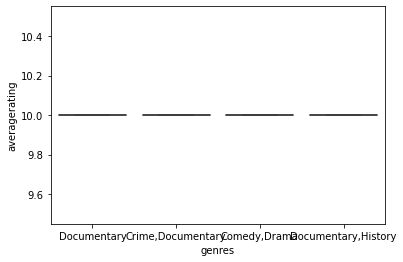

In [67]:
sns.boxplot(y ='averagerating' , x = 'genres', data = Merge, )
plt.show()

In [68]:
Joined_table.sort_values(by = "popularity", ascending = False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,Horror,Kids and Family,Musical and Performing Arts,Mystery and Suspense,Romance,Science Fiction and Fantasy,Special Interest,Sports and Fitness,Television,Western
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,0,0
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,1,0,0,0,0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,1,0,0,0,0,0,0,0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,1,0,0,0,0,0,0
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,"[80, 99]",53190,en,The Two Escobars,1.624,2010-06-22,The Two Escobars,7.4,18,...,0,0,0,0,0,0,0,0,0,0
996,996,"[27, 878, 53]",248670,en,Nightbeasts,1.615,2010-09-24,Nightbeasts,3.5,4,...,0,0,0,0,0,0,0,0,0,0
997,997,[35],43814,en,Something Like A Business,1.608,2010-06-15,Something Like A Business,3.6,5,...,1,0,0,1,0,0,0,0,0,0
998,998,"[27, 53]",39050,en,Meadowoods,1.603,2010-05-04,Meadowoods,5.0,6,...,0,0,0,0,0,0,0,0,0,0


In [69]:
Joined_table.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime', 'Action and Adventure',
       'Animation', 'Anime and Manga', 'Art House and International',
       'Classics', 'Comedy', 'Cult Movies', 'Documentary', 'Drama',
       'Faith and Spirituality', 'Gay and Lesbian', 'Horror',
       'Kids and Family', 'Musical and Performing Arts',
       'Mystery and Suspense', 'Romance', 'Science Fiction and Fantasy',
       'Special Interest', 'Sports and Fitness', 'Television', 'Western'],
      dtype='object')

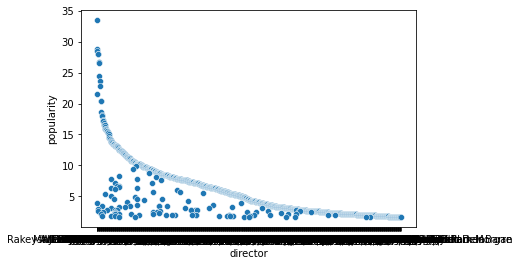

In [70]:
sns.scatterplot(y ='popularity' , x = 'director', data = Joined_table)
plt.show()

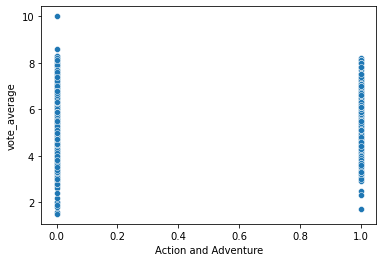

In [71]:
sns.scatterplot(y ='vote_average' , x = 'Action and Adventure', data = Joined_table)
plt.show()

In [72]:
rot_tom

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [73]:
clean_table = pd.merge(Joined_table, rot_tom, left_on = 'title', right_on= 'movie_title')
clean_table.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime_x', 'Action and Adventure',
       'Animation', 'Anime and Manga', 'Art House and International',
       'Classics', 'Comedy', 'Cult Movies', 'Documentary', 'Drama',
       'Faith and Spirituality', 'Gay and Lesbian', 'Horror',
       'Kids and Family', 'Musical and Performing Arts',
       'Mystery and Suspense', 'Romance', 'Science Fiction and Fantasy',
       'Special Interest', 'Sports and Fitness', 'Television', 'Western',
       'rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date',
       'runtime_y', 'production_company', 'tomatometer_status',
       'tomatometer_rating', 't

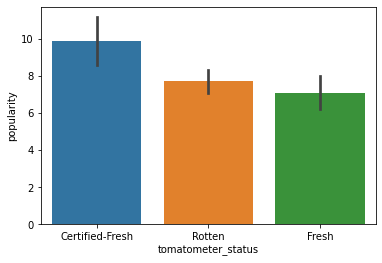

In [77]:
sns.barplot(x ='tomatometer_status', y = 'popularity', data = clean_table)
plt.show()

In [78]:
tn_movie_budgets["production_budget"] = tn_movie_budgets["production_budget"].str.replace("$","").str.replace(",","").astype(int)


In [79]:
tn_movie_budgets["domestic_gross"] = tn_movie_budgets["domestic_gross"].str.replace("$","").str.replace(",","").astype(int)



In [80]:
tn_movie_budgets["worldwide_gross"] = tn_movie_budgets["worldwide_gross"].str.replace("$","").str.replace(",","").astype("int64")


In [81]:
tn_movie_budgets["ROI"] = (tn_movie_budgets["worldwide_gross"] - tn_movie_budgets["production_budget"]) / tn_movie_budgets["production_budget"]


In [82]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.153696
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-1.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,39.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-0.732400
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1.000000


In [106]:
budget_reviews_genre_table = pd.merge(Joined_table, tn_movie_budgets, left_on = 'title', right_on= 'movie')

In [112]:
budget_reviews_genre_table.columns
ROI = budget_reviews_genre_table.head()

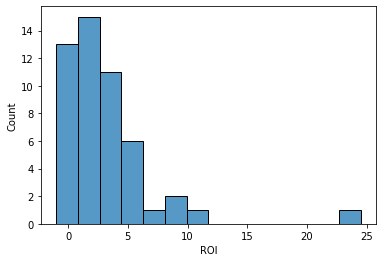

In [119]:
sns.histplot(x = 'ROI', data = ROI)
plt.show()